In [262]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time


#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models

import numpy as np
import pandas as pd

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import HTML

from IPython.display import clear_output

# Import module for data visualization
from plotnine import *
import plotnine

%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the scaled Training and Validation subsets 

In [2]:
X_train, y_train, X_valid, y_valid = utils.get_train_and_validation_data(
    scaled=True,
    use_diagnosis_delay=False,
)

display(X_train.head())
display(X_valid.head())



,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.50,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.67,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.75,0.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.25,0.0,1.0,0.33,0.5,0.0,0.0,0.5,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.50,0.0,1.0,1.00,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,0.5,0.67,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.75,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,1.00,1.0,1.0,1.0,1.0,0.0


,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.75,1.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.25,0.0,1.0,0.33,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.75,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.25,0.0,1.0,1.00,0.5,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,1.00,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.50,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0


# Train the Models using GridSearch using the inputs and outputs created in the previous step

In [526]:
%%time

csv_results_saved = os.path.abspath('exec_results/results_Single_Model.csv')


i = 1


# verify if already exists an CSV with the results
overwrite_results_saved_previously = True

if os.path.exists(csv_results_saved) and overwrite_results_saved_previously==False:
    print('Reading results saved previously...')
    df_results = utils.read_csv(csv_file=csv_results_saved)
else:
    df_results = None


kfold = utils_exec_models.get_kfold_splits()


## define the models and hyperparameters for the GridSearch
param_grid = []

TESTING = True
# TESTING = False

# utils_exec_models.create_models_SVM_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NB_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_DT_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_kNN_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_RF_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NN_grid(qty_features=X_train.shape[1],  param_grid=param_grid, testing=TESTING)

#display(param_grid)

params_grid = [
    utils_exec_models.create_models_NB_grid(testing=TESTING),
    utils_exec_models.create_models_SVM_grid(testing=TESTING),
    utils_exec_models.create_models_DT_grid(testing=TESTING),
    utils_exec_models.create_models_kNN_grid(testing=TESTING),
    utils_exec_models.create_models_RF_grid(testing=TESTING),
    utils_exec_models.create_models_NN_grid(qty_features=X_train.shape[1], testing=TESTING),

]

# print(params_grid)

det_curve_data = []
precision_recall_curve_data = []
roc_curve_data = []
predictions_data = []

for param_grid in params_grid:
    if len(param_grid) > 0:

        ## execute GridSearch
        grid, df_results_aux, det_curve_data_aux, precision_recall_curve_aux, roc_curve_aux, predictions_aux = utils_exec_models.exec_grid_search(
            param_grid=param_grid, 
            X=X_train, 
            y=y_train,
            cv=kfold,
            verbose=1,
            return_train_score=False,
            sort_results=False,
            dataset_info='Single-Model',
            features_info='All Features',
            #
            n_jobs=8, 
            X_valid=X_valid,
            y_valid=y_valid.values.ravel(),
            plot_roc_curve=True,
            refit='AUC',
        )

        det_curve_data.append(det_curve_data_aux)
        precision_recall_curve_data.append(precision_recall_curve_aux)
        roc_curve_data.append(roc_curve_aux)
        predictions_data.append(predictions_aux)
        
        if df_results is None:
            df_results = df_results_aux
        else:
            df_results = pd.concat([df_results, df_results_aux])

    #     clear_output()

        time.sleep(2)

#         break
    
print()
print('FINISHED !!!')


# sort performances results and show results
df_results = utils_exec_models.sort_performances_results(df=df_results)       
display(df_results)

# save the results
utils.save_to_csv(df=df_results, csv_file=csv_results_saved)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Classifier: GaussianNB
  Area under ROC: 0.88; Area under Prec-Recall curve: 0.50

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Classifier: SVC
  Area under ROC: 0.89; Area under Prec-Recall curve: 0.59

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Classifier: DecisionTreeClassifier
  Area under ROC: 0.82; Area under Prec-Recall curve: 0.45

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Classifier: KNeighborsClassifier
  Area under ROC: 0.78; Area under Prec-Recall curve: 0.41

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Classifier: RandomForestClassifier
  Area under ROC: 0.88; Area under Prec-Recall curve: 0.53

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Classifier: MLPClassifier
  Area under ROC: 0.87; Area under Prec-Recall curve: 0.53


FINISHED !!!


,Dataset,Features,Model,BalAcc,Sens,Spec,f1,AUC,Acc,Prec,Classifier,Hyperparams
0,Single-Model,All Features,SVM,0.82,0.85,0.78,0.49,0.89,0.79,0.35,SVC,"C=0.3,class_weight='balanced',gamma='auto',pro..."
0,Single-Model,All Features,Random Forest,0.78,0.74,0.81,0.47,0.88,0.80,0.34,RandomForestClassifier,"class_weight='balanced',max_depth=5,n_estimato..."
0,Single-Model,All Features,Decision Tree,0.77,0.81,0.72,0.42,0.82,0.73,0.28,DecisionTreeClassifier,"class_weight='balanced',max_depth=5,random_sta..."
0,Single-Model,All Features,Naïve Bayes,0.77,0.70,0.84,0.49,0.88,0.82,0.37,GaussianNB,
0,Single-Model,All Features,Neural Networks,0.72,0.51,0.93,0.49,0.87,0.88,0.48,MLPClassifier,"alpha=0.1,hidden_layer_sizes=22,learning_rate_..."
0,Single-Model,All Features,k-NN,0.63,0.30,0.97,0.39,0.78,0.89,0.56,KNeighborsClassifier,"metric='manhattan',weights='distance'"


6 samples were saved
CPU times: user 2.36 s, sys: 161 ms, total: 2.52 s
Wall time: 21.2 s


# Plot Detection Error Tradeoff (DET) curve

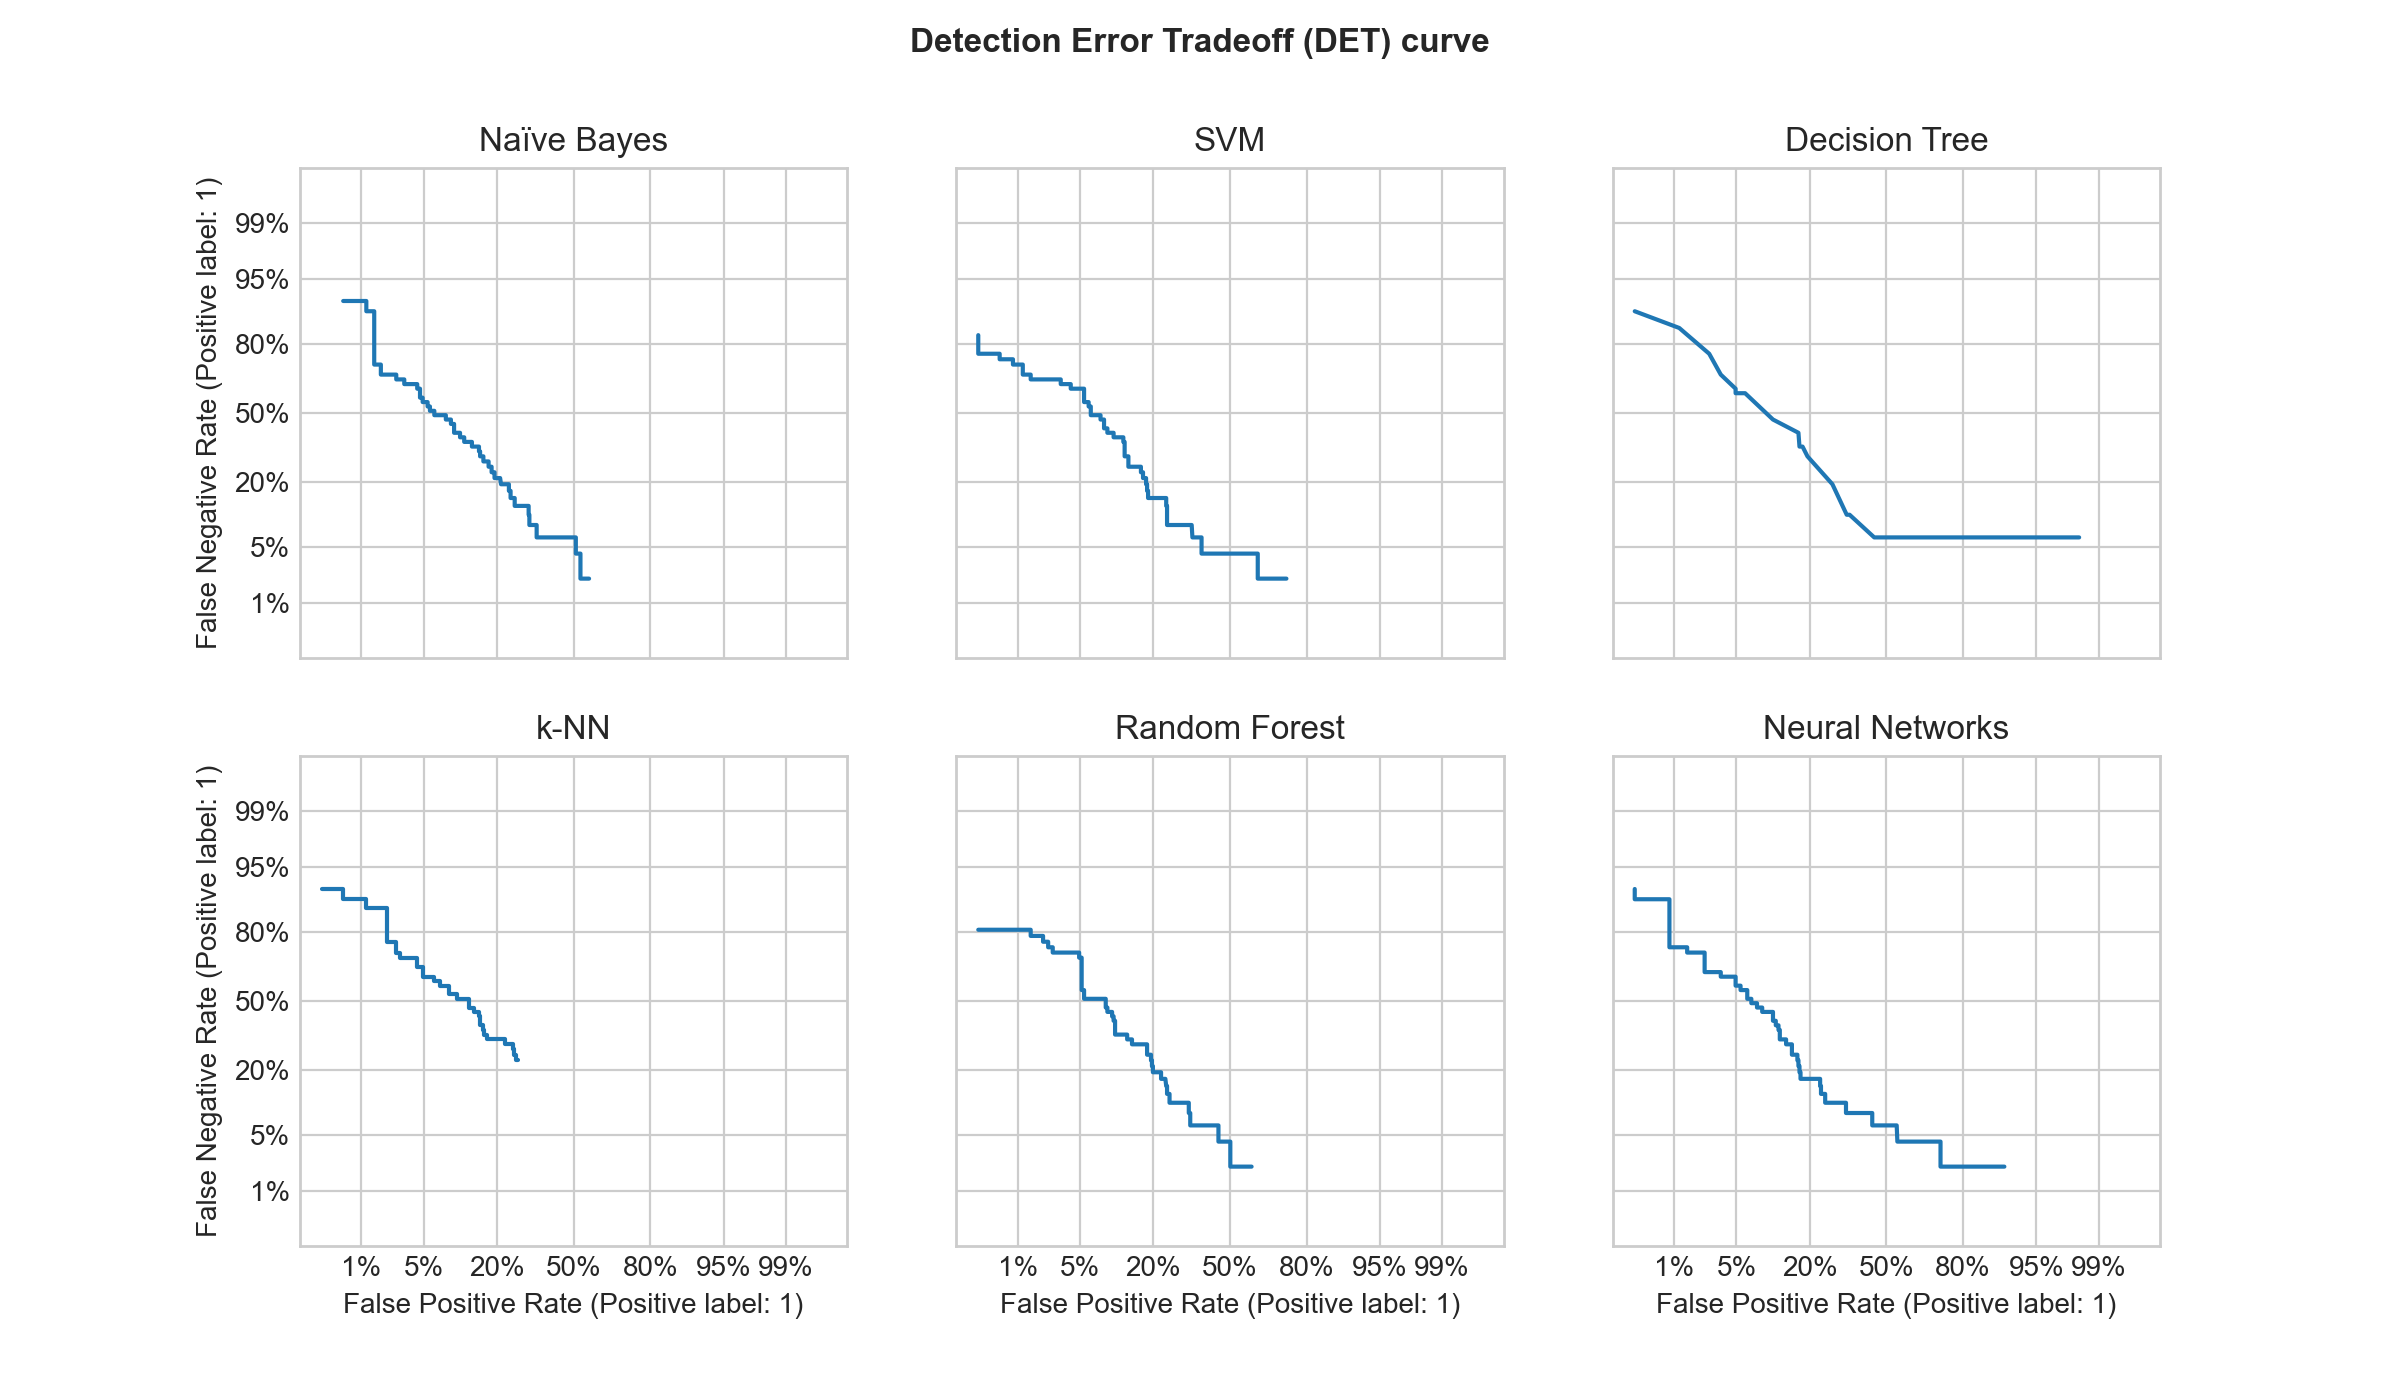

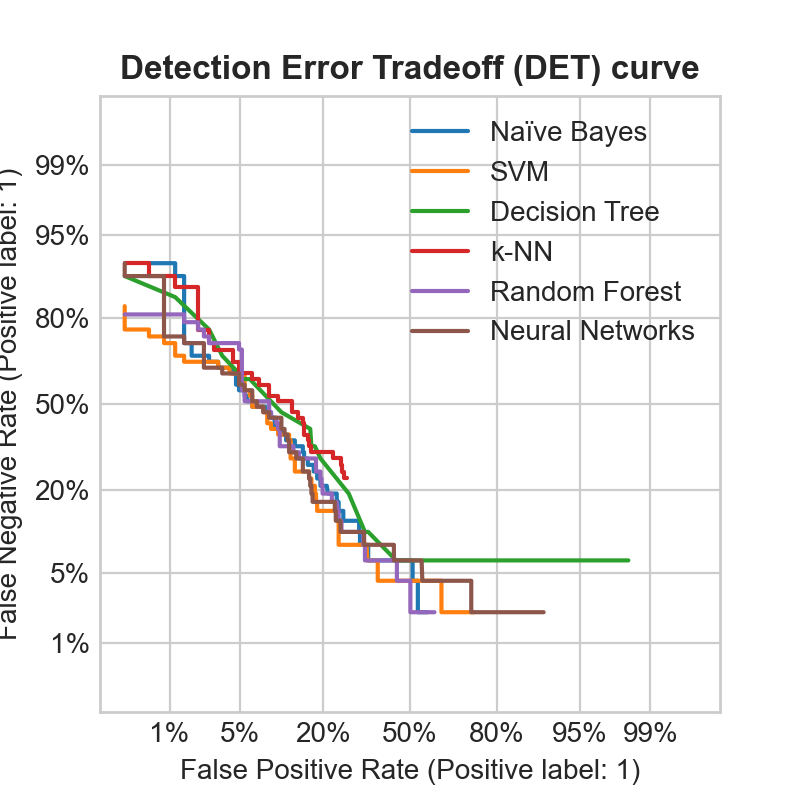

In [588]:
figsize = (12,7)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

idx_ax = 0
for estimator_name, fpr, fnr, thresholds in det_curve_data:
    ax = axes[idx_ax]
    disp = sk.metrics.DetCurveDisplay(
        fpr=fpr, 
        fnr=fnr, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1,
    )
    disp.plot(ax=ax)
    
    ax.set_title(utils.get_model_description(estimator_name))
    ax.get_legend().remove()
    
    if idx_ax not in [0,3]:
        ax.set_ylabel('')

    if idx_ax < 3:
        ax.set_xlabel('')

    idx_ax += 1

plt.suptitle('Detection Error Tradeoff (DET) curve', fontweight='bold')
plt.show()


# ==========================
# show all together
# ==========================
figsize = (4,4)
fig, (ax) = plt.subplots(1, 1, figsize=figsize)
for estimator_name, fpr, fnr, thresholds in det_curve_data:
    disp = sk.metrics.DetCurveDisplay(
        fpr=fpr, 
        fnr=fnr, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1,
    )
    disp.plot(ax=ax)    
plt.title('Detection Error Tradeoff (DET) curve', fontweight='bold')
ax.legend(loc='upper right')
plt.show()
plt.close()

# Plot Precision-Recall curve

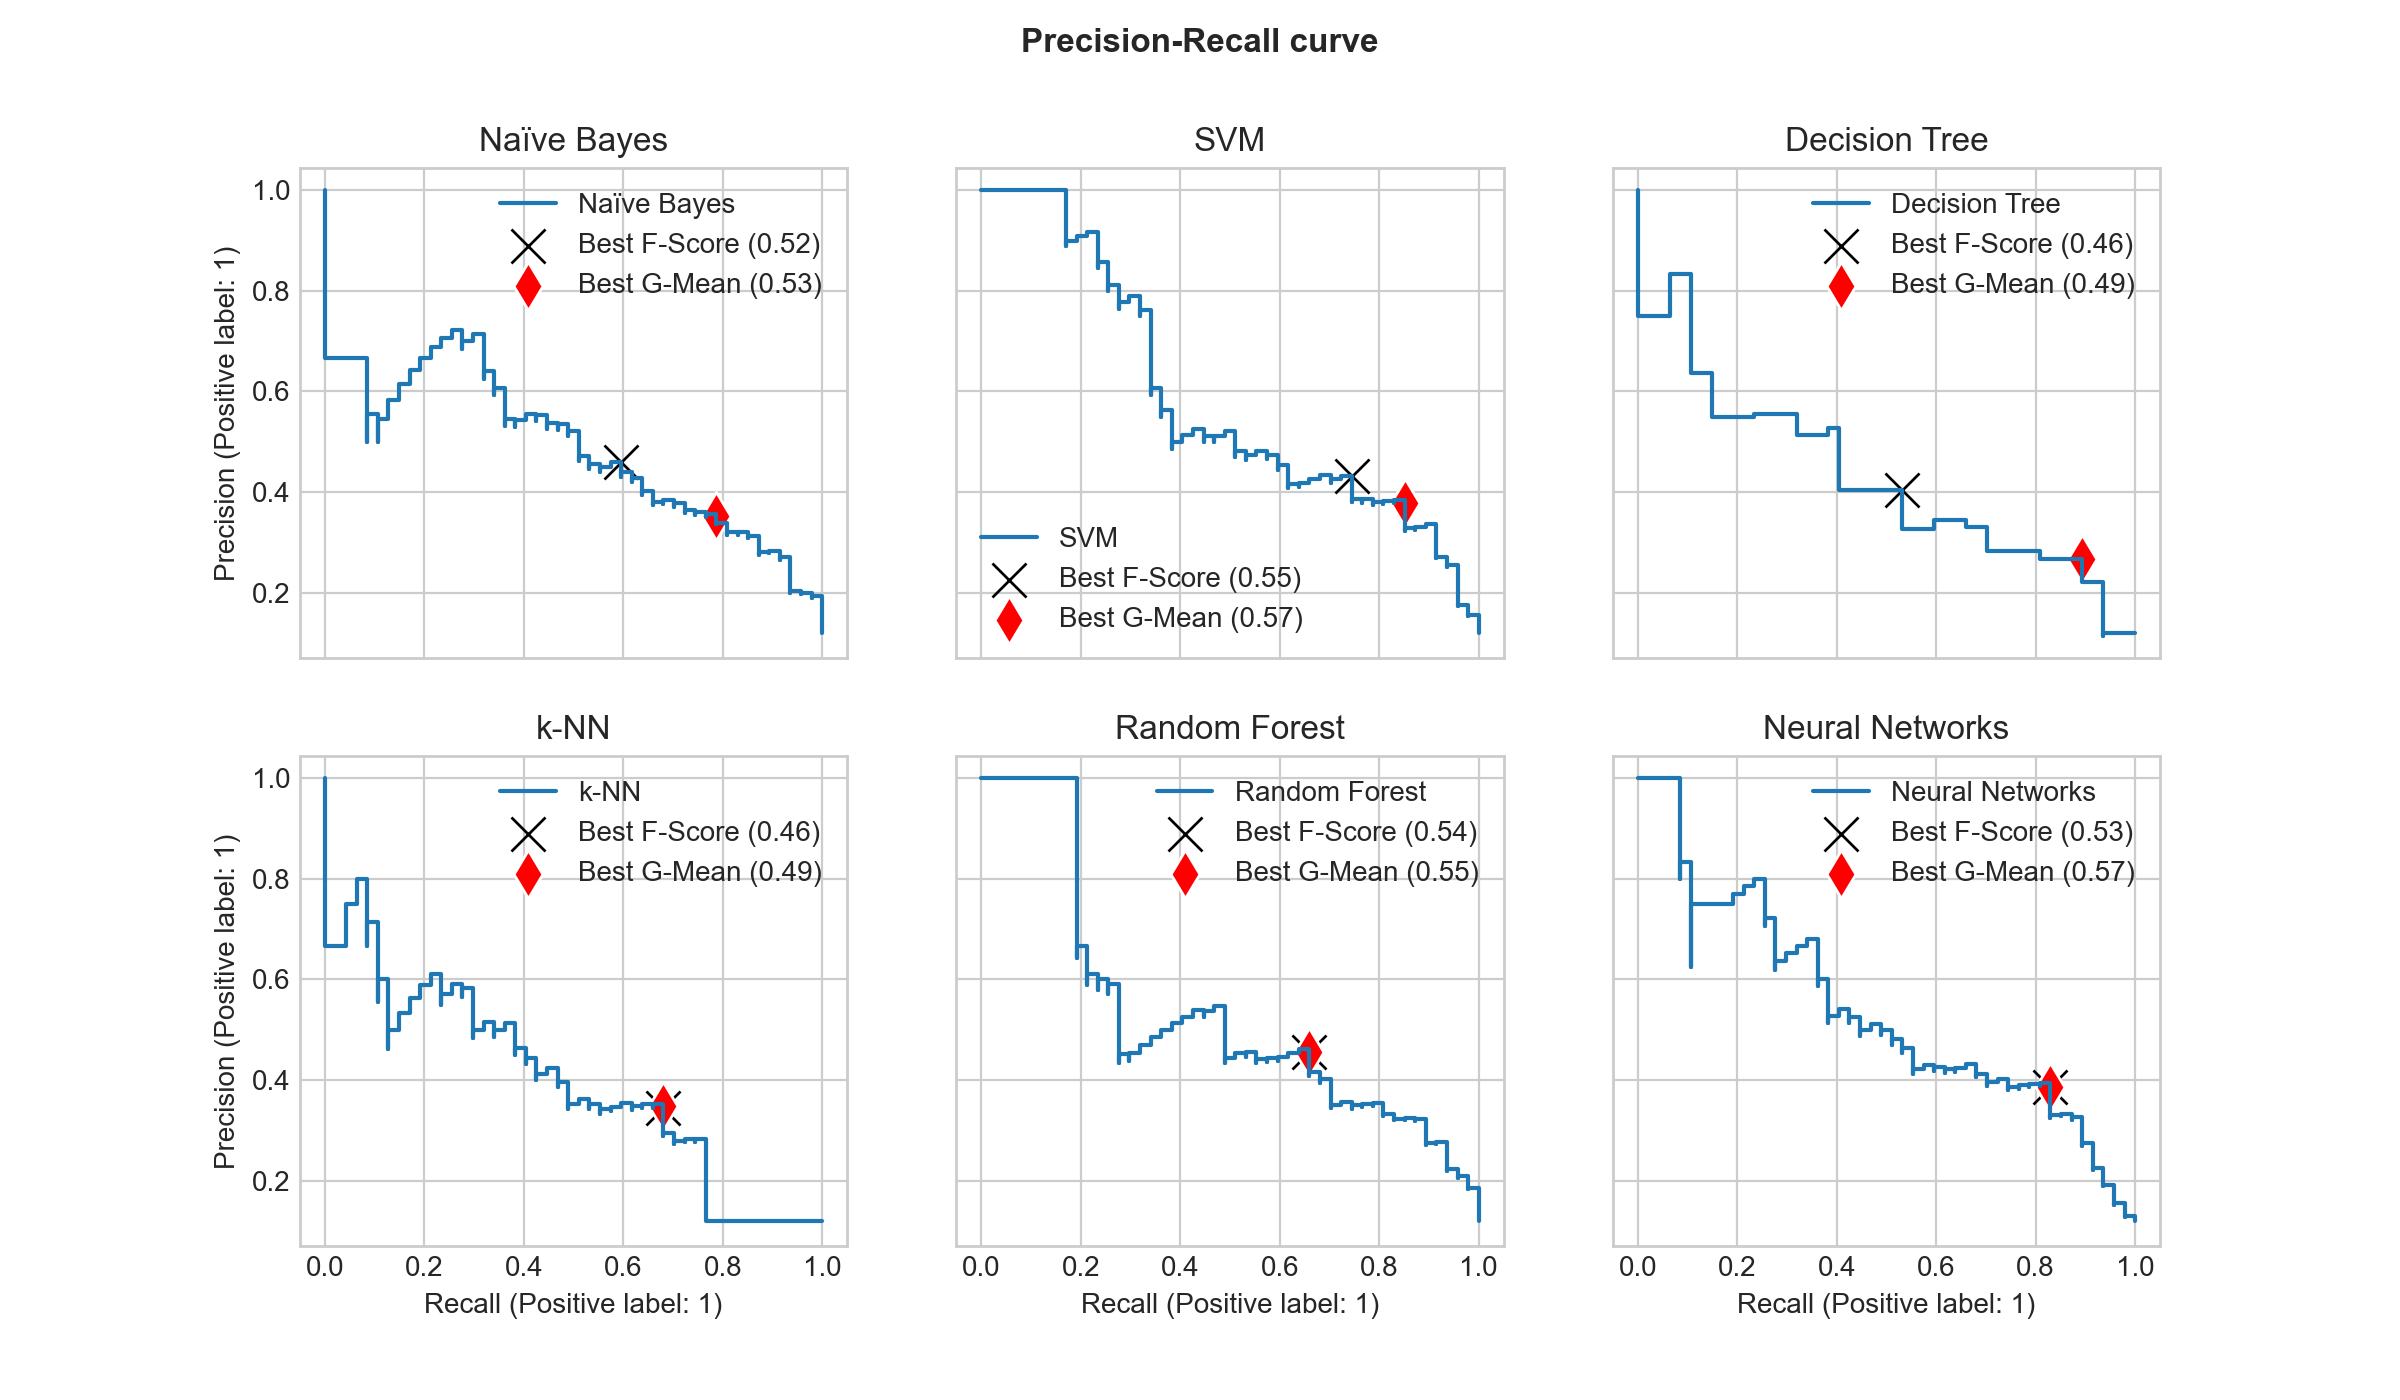

Estimator: GaussianNB               ; Best Threshold: 0.98; F-score : 0.51852; Sens: 0.60; Prec: 0.46
                                      Best Threshold: 0.17; Gmean   : 0.48684; Sens: 0.79; Prec: 0.35
Estimator: SVC                      ; Best Threshold: 0.23; F-score : 0.54688; Sens: 0.74; Prec: 0.43
                                      Best Threshold: 0.15; Gmean   : 0.52288; Sens: 0.85; Prec: 0.38
Estimator: DecisionTreeClassifier   ; Best Threshold: 0.70; F-score : 0.45872; Sens: 0.53; Prec: 0.40
                                      Best Threshold: 0.44; Gmean   : 0.41176; Sens: 0.89; Prec: 0.27
Estimator: KNeighborsClassifier     ; Best Threshold: 0.19; F-score : 0.46377; Sens: 0.68; Prec: 0.35
                                      Best Threshold: 0.19; Gmean   : 0.46043; Sens: 0.68; Prec: 0.35
Estimator: RandomForestClassifier   ; Best Threshold: 0.59; F-score : 0.54386; Sens: 0.66; Prec: 0.46
                                      Best Threshold: 0.59; Gmean   : 0.53913; Sen

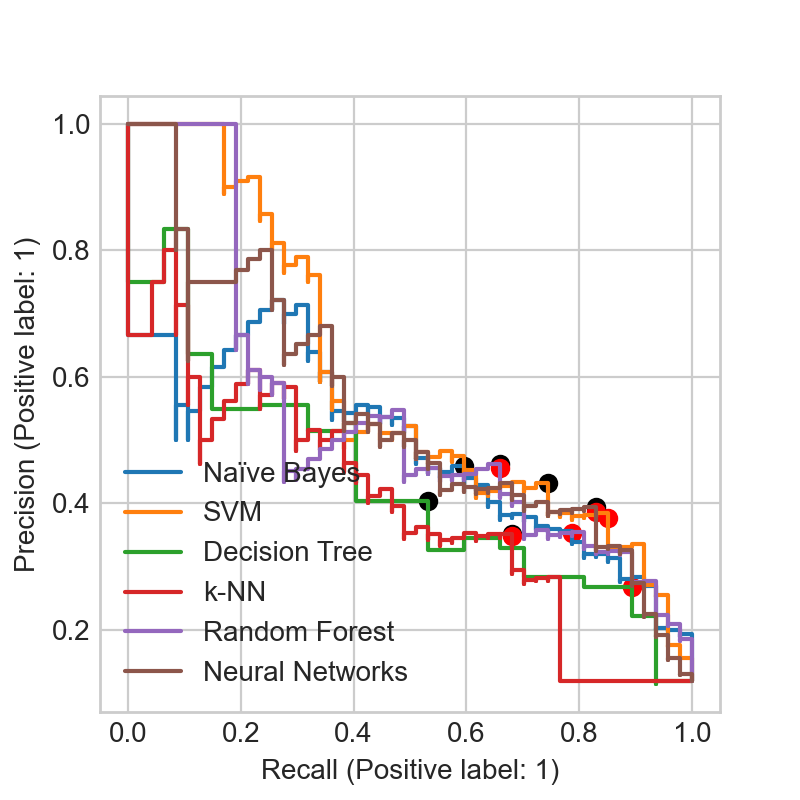

In [639]:
figsize = (12,7)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

idx_ax = 0
for estimator_name, precision, recall, thresholds in precision_recall_curve_data:

    ax = axes[idx_ax]
    disp = sk.metrics.PrecisionRecallDisplay(
        precision=precision, 
        recall=recall, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1,
    )
    disp.plot(ax=ax)
    
    ax.set_title(utils.get_model_description(estimator_name))
#     ax.get_legend().remove()
    
    if idx_ax not in [0,3]:
        ax.set_ylabel('')

    if idx_ax < 3:
        ax.set_xlabel('')
        
    # calculate to f score
    fscore = np.round((2 * precision * recall) / (precision + recall), 2)
    ix_fscore = np.argmax(fscore)
    
    
    marker_size = 150
    
    sns.scatterplot(
        ax=ax,
        x=[recall[ix_fscore]], 
        y=[precision[ix_fscore]], 
        marker='x', 
        s=marker_size,
        color='black', 
        label=f'Best F-Score ({fscore[ix_fscore]})',
        
    )
    
    # convert to GMean
    gmeans = np.round(np.sqrt(recall * (precision)), 2)
    ix_gmeans = np.argmax(gmeans)
    
        
    # highlight best threshold using GMean
    sns.scatterplot(
        ax=ax,
        x=[recall[ix_gmeans]], 
        y=[precision[ix_gmeans]], 
        marker='d', 
        s=marker_size,
        color='red', 
        label=f'Best G-Mean ({gmeans[ix_gmeans]})',
    )

    # increment axis index
    idx_ax += 1

plt.suptitle('Precision-Recall curve', fontweight='bold')
plt.show()


# ==========================
# show all together
# ==========================
figsize = (4,4)

fig, (ax) = plt.subplots(1, 1, figsize=figsize)
for estimator_name, precision, recall, thresholds in precision_recall_curve_data:
    
#     fig, (ax) = plt.subplots(1, 1, figsize=figsize)

    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    ix_fscore = np.argmax(fscore)
    

    # convert to GMean
    gmean = np.round(np.sqrt(recall * (precision)), 2)
    ix_gmean = np.argmax(gmean)

    print(f'Estimator: {estimator_name:<25}; Best Threshold: {thresholds[ix_fscore]:.2f}; F-score : {fscore[ix_fscore]:.5f}; Sens: {recall[ix_fscore]:.2f}; Prec: {precision[ix_fscore]:.2f}')
    print(f'{"":>37} Best Threshold: {thresholds[ix_gmean]:.2f}; Gmean   : {fscore[ix_gmean]:.5f}; Sens: {recall[ix_gmean]:.2f}; Prec: {precision[ix_gmean]:.2f}')
    
    
    disp = sk.metrics.PrecisionRecallDisplay(
        precision=precision, 
        recall=recall, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1,
    )
    disp.plot(ax=ax)   
    
    # highlight best threshold using f score
    ax.scatter(
        recall[ix_fscore], 
        precision[ix_fscore], 
        marker='o', 
        color='black', 
    )
    
    # highlight best threshold using GMean
    ax.scatter(
        recall[ix_gmean], 
        precision[ix_gmean], 
        marker='o', 
        color='red', 
    )
    
#     break
    
    
plt.show()





# Plot ROC

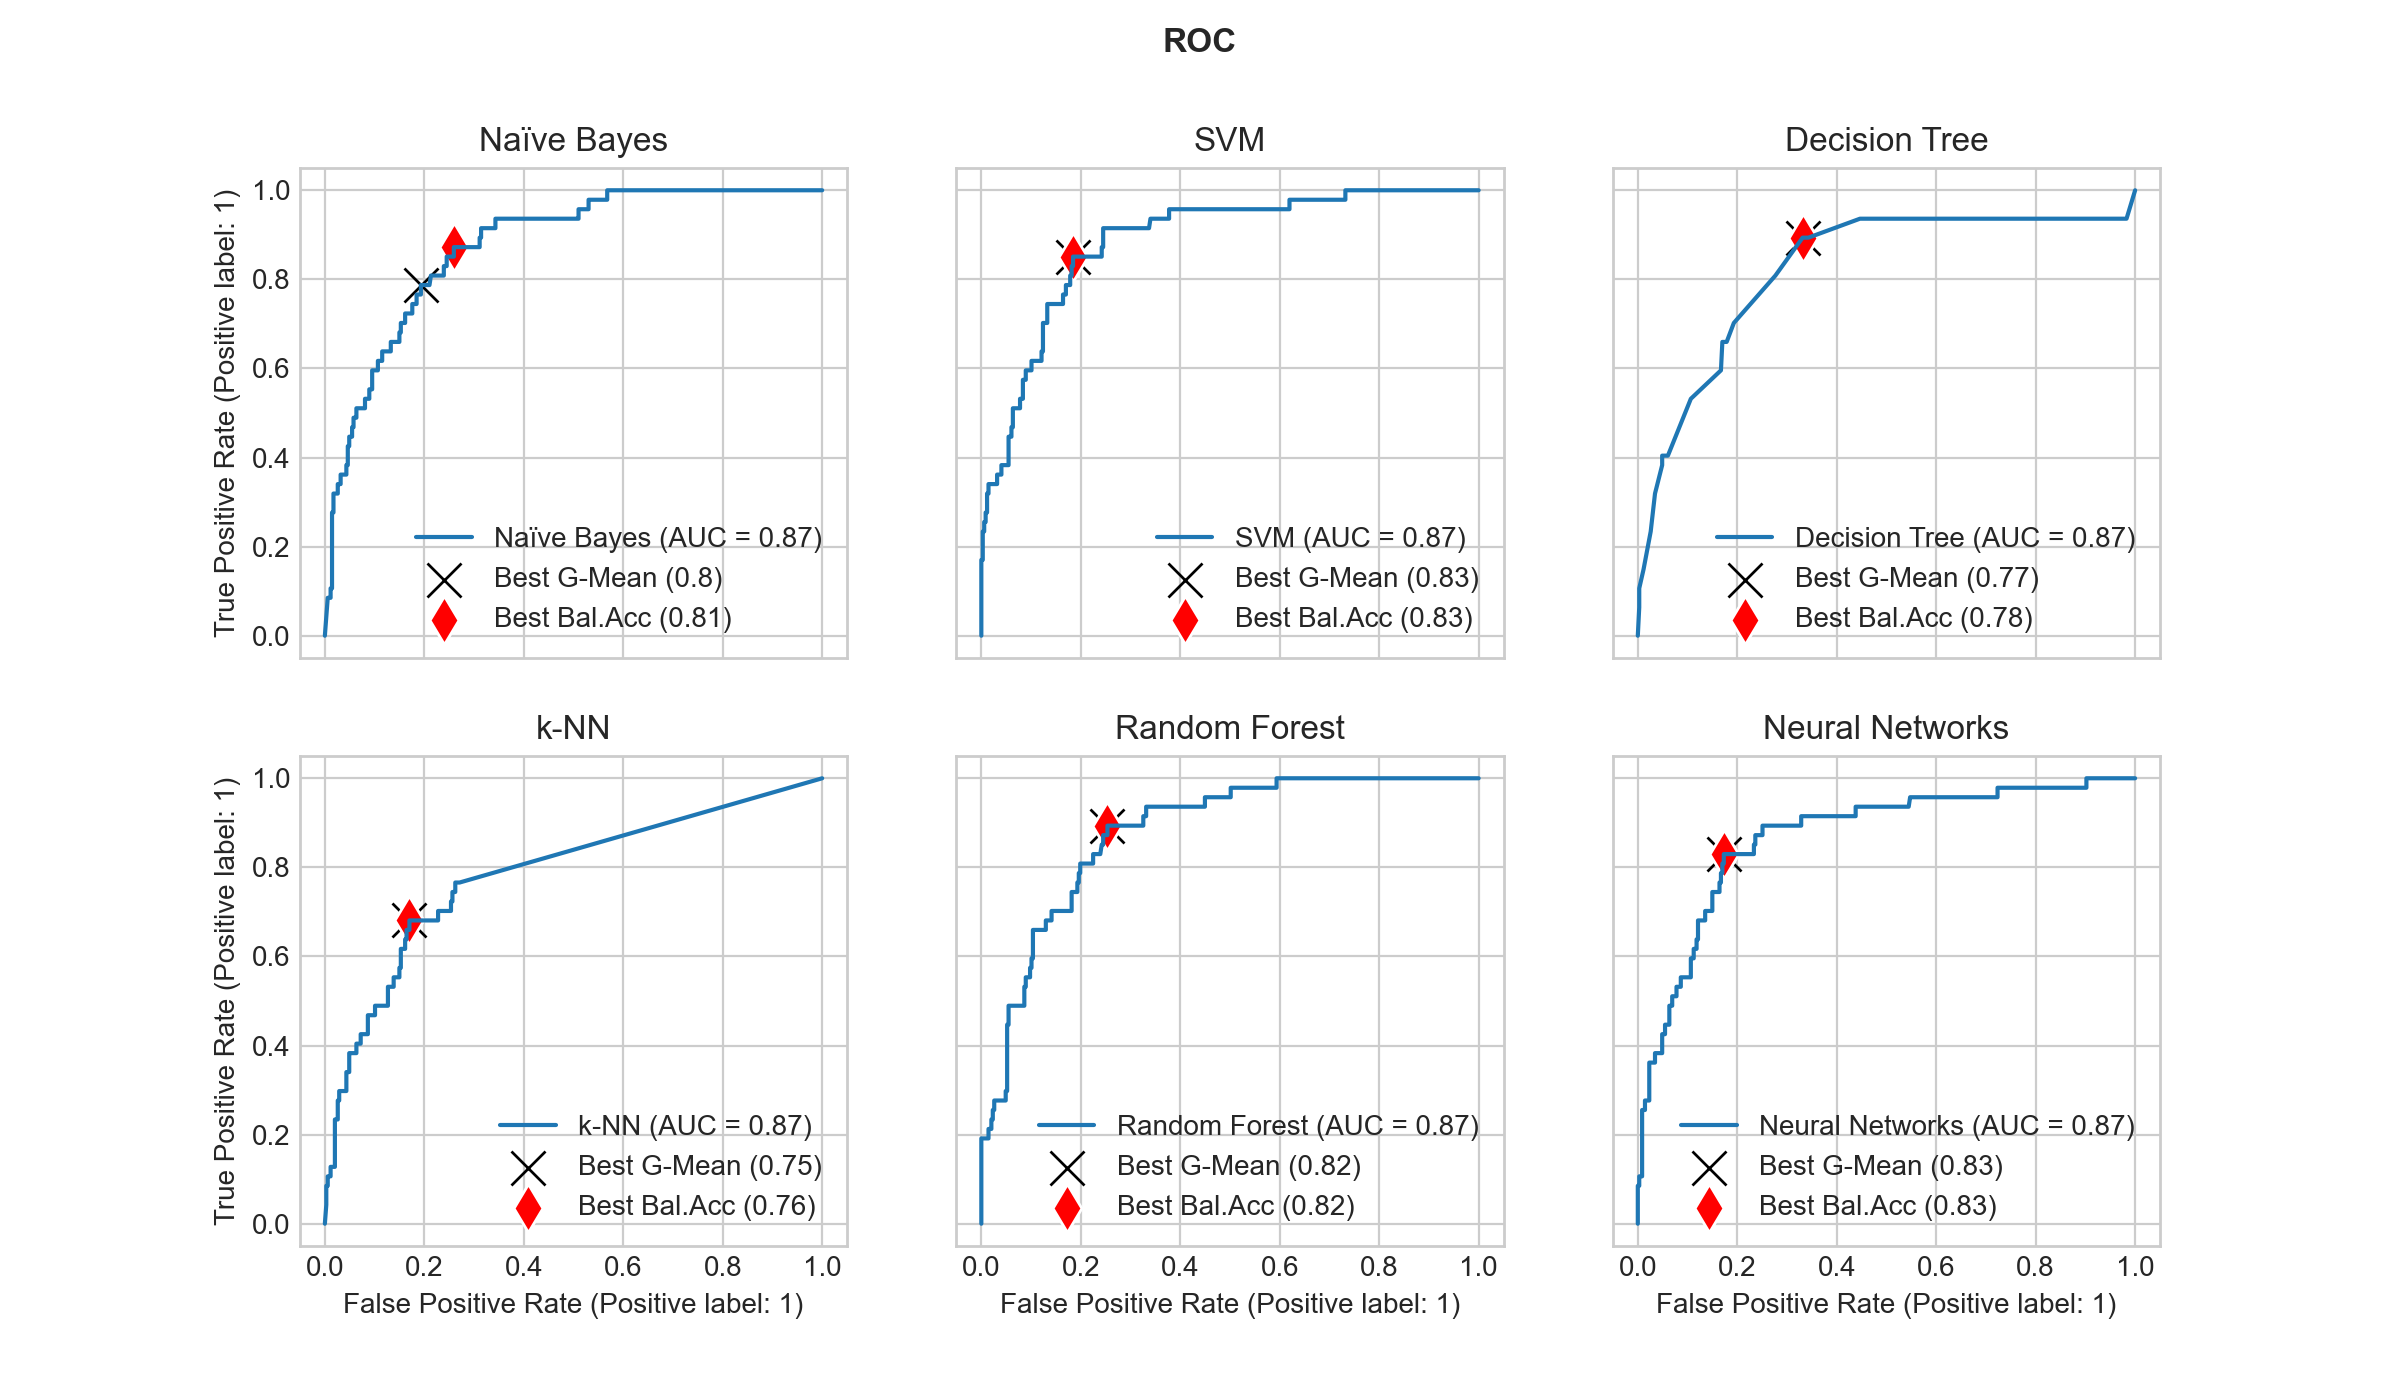

Estimator: GaussianNB               ; Best Threshold: 0.18; G-Mean : 0.80000; Sens: 0.79; Spec: 0.81
                                                    : 0.03; Bal.Acc: 0.81000; Sens: 0.87; Spec: 0.74
Estimator: SVC                      ; Best Threshold: 0.16; G-Mean : 0.83000; Sens: 0.85; Spec: 0.82
                                                    : 0.16; Bal.Acc: 0.83000; Sens: 0.85; Spec: 0.82
Estimator: DecisionTreeClassifier   ; Best Threshold: 0.44; G-Mean : 0.77000; Sens: 0.89; Spec: 0.67
                                                    : 0.44; Bal.Acc: 0.78000; Sens: 0.89; Spec: 0.67
Estimator: KNeighborsClassifier     ; Best Threshold: 0.19; G-Mean : 0.75000; Sens: 0.68; Spec: 0.83
                                                    : 0.19; Bal.Acc: 0.76000; Sens: 0.68; Spec: 0.83
Estimator: RandomForestClassifier   ; Best Threshold: 0.43; G-Mean : 0.82000; Sens: 0.89; Spec: 0.75
                                                    : 0.43; Bal.Acc: 0.82000; Sens: 0.89; S

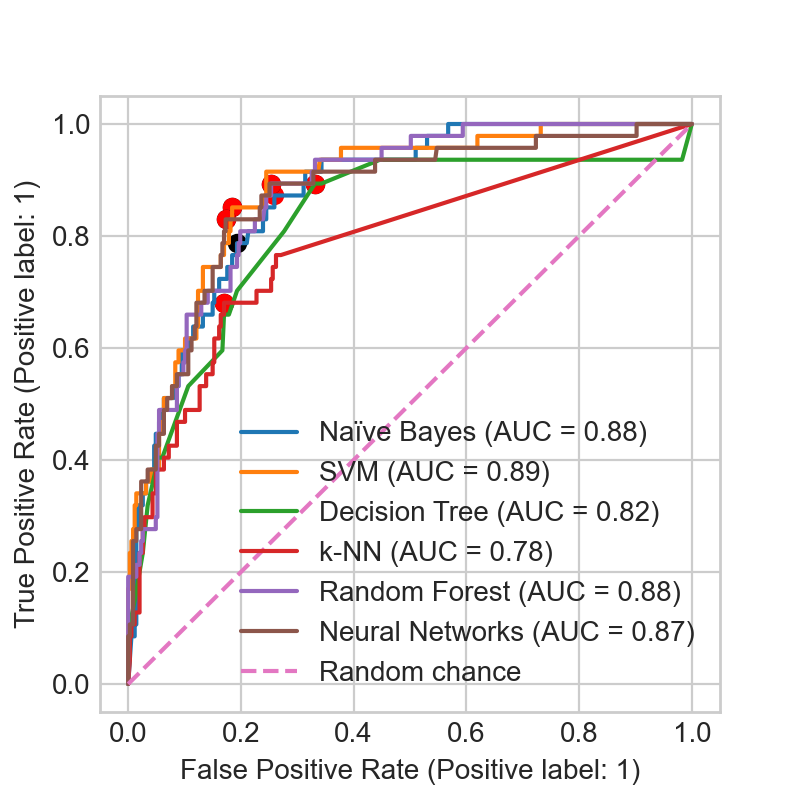

In [640]:
figsize = (12,7)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

idx_ax = 0
for estimator_name, fpr, tpr, thresholds in roc_curve_data:

    ax = axes[idx_ax]
    disp = sk.metrics.RocCurveDisplay(
        fpr=fpr, 
        tpr=tpr, 
        roc_auc=roc_auc, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1
    )
    disp.plot(ax=ax)
    
    ax.set_title(utils.get_model_description(estimator_name))
#     ax.get_legend().remove()
    
    if idx_ax not in [0,3]:
        ax.set_ylabel('')

    if idx_ax < 3:
        ax.set_xlabel('')
        


    marker_size = 150
    
    # G-Mean
    gmeans = np.round(np.sqrt(tpr * (1-fpr)), 2)
    ix_gmeans = np.argmax(gmeans)
    
    sns.scatterplot(
        ax=ax,
        x=[fpr[ix_gmeans]], 
        y=[tpr[ix_gmeans]], 
        marker='x', 
        s=marker_size,
        color='black', 
        label=f'Best G-Mean ({gmeans[ix_gmeans]})',
    )
    
    
    # balanced accuracy
    bal_accs = np.round( ((tpr + (1-fpr))/2), 2)
    ix_balacc = np.argmax(bal_accs)
    
        
    # highlight best threshold using GMean
    sns.scatterplot(
        ax=ax,
        x=[fpr[ix_balacc]], 
        y=[tpr[ix_balacc]], 
        marker='d', 
        s=marker_size,
        color='red', 
        label=f'Best Bal.Acc ({bal_accs[ix_balacc]})',
    )

    # increment axis index
    idx_ax += 1

plt.suptitle('ROC', fontweight='bold')
plt.show()





# ==========================
# show all together
# ==========================
figsize = (4,4)

fig, (ax1) = plt.subplots(1, 1, figsize=figsize)
for estimator_name, fpr, tpr, thresholds in roc_curve_data:
    
#     display(df_results.loc[(df_results.Classifier == estimator_name)])
    
#     figsize = (15,5)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    roc_auc = sk.metrics.auc(fpr, tpr)

    
    sens = tpr
    spec = (1-fpr)
    
    # G-Mean: is a metric for imbalanced classification that, if optimized, 
    # will seek a balance between the sensitivity and the specificity.
    # Here is calculated the g-mean for each threshold
    gmeans = np.round(np.sqrt(tpr * (1-fpr)), 2)
    # locate the index of the largest g-mean
    ix_gmeans = np.argmax(gmeans)
    print(f'Estimator: {estimator_name:<25}; Best Threshold: {thresholds[ix_gmeans]:.2f}; G-Mean : {gmeans[ix_gmeans]:.5f}; Sens: {sens[ix_gmeans]:.2f}; Spec: {spec[ix_gmeans]:.2f}')
    
    # balanced accuracy
    bal_accs = np.round( ((tpr + (1-fpr))/2), 2)
    # locate the index of the largest bal_acc
    ix_balacc = np.argmax(bal_accs)
    print(f'{"":>37}               : {thresholds[ix_balacc]:.2f}; Bal.Acc: {bal_accs[ix_balacc]:.5f}; Sens: {sens[ix_balacc]:.2f}; Spec: {spec[ix_balacc]:.2f}')
    

    
    disp = sk.metrics.RocCurveDisplay(
        fpr=fpr, 
        tpr=tpr, 
        roc_auc=roc_auc, 
        estimator_name=utils.get_model_description(estimator_name),
        pos_label=1
    )
    disp.plot(ax=ax1)
    
    # highlight best threshold using G-Means
    ax1.scatter(
        fpr[ix_gmeans], 
        tpr[ix_gmeans], 
        marker='o', 
        color='black', 
    )

    # highlight best threshold using Bal.Accuracy
    ax1.scatter(
        fpr[ix_balacc], 
        tpr[ix_balacc], 
        marker='o', 
        color='red', 
    )



g = sns.lineplot(
    x=[0,1], 
    y=[0,1], 
    ax=ax1,
    linestyle='--', 
    label='Random chance'
)


ax1.legend(loc='lower right')
plt.show()
plt.close()


---
---
---
# OTHERS

## Test create a classifier using the  model + hyperparams from the results

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC


df_results = utils.read_csv(csv_file=csv_results_saved)

dd = list()

for index, row in df_results.iterrows():
    dd.append([row.Classifier, row.Hyperparams])


for m, h in dd:

    model = utils_exec_models.create_model_from_string(
        model=m,
        hyperparams=h,
    )

#     model.fit(
#         X_train, 
#         y_train[utils.CLASS_COLUMN].ravel()
#     )
    
#     y_pred = model.predict(X_valid)
    
    print(model)
#     print(y_pred)
    print()
    

SVC(C=0.5, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.5, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.7, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.7, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.3, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.3, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1500, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1500, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SV

In [ ]:
df_results

### Show other grid properties

In [ ]:
print(f'Best Bal.Acc.: {grid.best_score_:.2f}')
print(f'        Model: {grid.best_params_["classifier"]} ') 
print(f'Performance using the Validation set:  {grid.score(X_valid, y_valid):.2f}')


